[학습목표]<br>
기상자료개방포털에서 데이터를 수집하여 전처리하고, 서울시 연간 기온 변화를 분석하고 시각화할 수 있다.

# 전국 기온 데이터 수집

* 기상자료개방포털<br>
https://data.kma.go.kr<br><br>

* 기상자료개방포털 > 데이터 > 기상관측 > 지상 > 종관기상관측(ASOS)<br>
https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
회원가입/로그인 필요<br>
[ 자료형태 ] 일자료<br>
[ 지점 ] 전체<br>
[ 자료 ] 기온>최저,최고,평균<br>
[ 기간 ] 1911~2020 (10년단위로 나누어 다운로드)


# 전국 기온 데이터 확인
* 데이터프레임 생성하고 데이터 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

## 데이터프레임 생성
* 데이터 파일(csv)을 data폴더에 업로드한다.
* pd.read_csv(파일경로, encoding ='cp949')

In [3]:
df_1911 = pd.read_csv('data/1911-1920 일별 기온.csv', encoding ='cp949')
df_1921 = pd.read_csv('data/1921-1930 일별 기온.csv', encoding ='cp949')
df_1931 = pd.read_csv('data/1931-1940 일별 기온.csv', encoding ='cp949')
df_1941 = pd.read_csv('data/1941-1950 일별 기온.csv', encoding ='cp949')
df_1951 = pd.read_csv('data/1951-1960 일별 기온.csv', encoding ='cp949')
df_1961 = pd.read_csv('data/1961-1970 일별 기온.csv', encoding ='cp949')
df_1971 = pd.read_csv('data/1971-1980 일별 기온.csv', encoding ='cp949')
df_1981 = pd.read_csv('data/1981-1990 일별 기온.csv', encoding ='cp949')
df_1991 = pd.read_csv('data/1991-2000 일별 기온.csv', encoding ='cp949')
df_2001 = pd.read_csv('data/2001-2010 일별 기온.csv', encoding ='cp949')
df_2011 = pd.read_csv('data/2011-2020 일별 기온.csv', encoding ='cp949')

In [4]:
df_2011.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
342985,295,남해,2020-12-27,4.4,2.5,6.0
342986,295,남해,2020-12-28,4.7,1.1,11.5
342987,295,남해,2020-12-29,5.4,1.0,11.2
342988,295,남해,2020-12-30,-3.0,-5.4,1.6
342989,295,남해,2020-12-31,-1.3,-7.4,2.8


## 데이터프레임 연결하기
* `pd.concat(데이터프레임리스트, axis=0)` : 행 방향으로 연결(default)<br>
* `pd.concat(데이터프레임리스트, axis=1)` : 열 방향으로 연결<br>
* `ignore_index=True` : 인덱스 제지정
[df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]

In [5]:
df = pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011],
              ignore_index=True)

In [6]:
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5
...,...,...,...,...,...,...
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6


## 데이터타입 확인/변경

### 데이터타입 확인
* `데이터프레임.dtypes`

In [7]:
# 데이터타입 확인
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

### 데이터타입 변경
* `pd.to_datetime(컬럼)` : datetime형으로 변경

In [8]:
# '일시' 컬럼을 datetime형으로 변경
df['일시'] = pd.to_datetime(df['일시'])

In [9]:
# 변경 확인
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 데이터 크기 확인
* `데이터프레임.shape`

In [10]:
df.shape

(1596835, 6)

## 데이터 정보 확인
* `데이터프레임.info()`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596835 entries, 0 to 1596834
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   지점        1596835 non-null  int64         
 1   지점명       1596835 non-null  object        
 2   일시        1596835 non-null  datetime64[ns]
 3   평균기온(°C)  1594136 non-null  float64       
 4   최저기온(°C)  1596638 non-null  float64       
 5   최고기온(°C)  1596667 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 73.1+ MB


## 데이터 내용 확인

### 지점명, 지점명의 개수 확인
* 컬럼.unique() : 컬럼의 중복을 배제한 값 목록
* 컬럼.nunique() : 컬럼의 중복을 배제한 값 개수

In [12]:
# 지점명 확인
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [13]:
# 지점명  개수 확인
df['지점명'].nunique()

102

### 연도의 개수 확인
* datetime에서 연도, 월, 일 가져오기<br>
`컬럼.dt.year` `컬럼.dt.month` `컬럼.dt.day`

In [14]:
df['일시'].dt.year.nunique()

110

### 연도별 데이터 개수 확인

In [15]:
df['일시'].dt.year.value_counts()

2020    34767
2019    34738
2018    34673
2017    34668
2016    34496
        ...  
1917     2190
1915     2190
1914     2190
1913     2190
1911     1836
Name: 일시, Length: 110, dtype: int64

### 지점별 데이터 개수 확인

In [16]:
df['지점명'].value_counts()

대구       40148
목포       40148
부산       40148
인천       39660
강릉       39479
         ...  
진도군       2423
홍성        1885
북춘천       1553
대구(기)      619
세종         581
Name: 지점명, Length: 102, dtype: int64

# 서울시 기온 데이터 추출 및 확인

## 서울시 데이터만 추출하여 서브셋 생성
* 조건으로 데이터를 추출하여 서브셋을 만들 때, copy본으로 만드는 것을 권장. : `.copy()`

In [17]:
df_seoul = df[df['지점명']=='서울'].copy()
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


## 결측치 분석
* `데이터프레임.isnull().sum()`

In [18]:
# 결측치 확인
df_seoul.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    2
최고기온(°C)    3
dtype: int64

In [19]:
# 결측치가 있는 데이터 보기
df_seoul[(df_seoul['최저기온(°C)'].isnull()) | (df_seoul['최고기온(°C)'].isnull())]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
181051,108,서울,1967-02-19,-1.7,NaN,NaN
254079,108,서울,1973-10-16,12.3,NaN,NaN
1294404,108,서울,2017-10-12,11.4,8.8,NaN


## 결측치 제거
* `데이터프레임.dropna()` : 결측치가 포함된 행을 모두 제거

In [20]:
# 결측치 제거
df_seoul = df_seoul.dropna()

In [21]:
# 결측치 확인
df_seoul.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [22]:
# 데이터프레임 크기
df_seoul.shape

(38958, 6)

## 연도별 데이터 개수 확인

In [23]:
# 연도별 데이터 개수 확인
df_seoul['일시'].dt.year.value_counts()

1920    366
1972    366
1992    366
1932    366
1964    366
       ... 
1967    364
1973    364
1931    335
1950    243
1953     31
Name: 일시, Length: 108, dtype: int64

## 시각화로 데이터 확인
* 최저기온
* 평균기온
* 최고기온

In [24]:
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


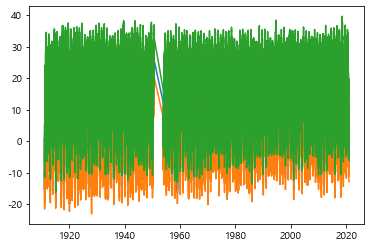

In [25]:
plt.plot(df_seoul['일시'], df_seoul['평균기온(°C)'])
plt.plot(df_seoul['일시'], df_seoul['최저기온(°C)'])
plt.plot(df_seoul['일시'], df_seoul['최고기온(°C)'])

In [26]:
# 1951년 데이터 추출
df_seoul[df_seoul['일시'].dt.year==1951]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)


In [27]:
# 1952년 데이터 추출
df_seoul[df_seoul['일시'].dt.year==1952]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)


# 서울시 연간 평균기온, 최저기온, 최고기온 변화 시각화

## 서울시 연간 평균기온 변화

### 연간 평균기온 추출
* `연간 일 평균기온의 평균`<br>
연도로 그룹화하여 연도별 평균기온 산출

In [28]:
df_seoul_mean = df_seoul.groupby(df_seoul['일시'].dt.year)['평균기온(°C)'].mean()
df_seoul_mean

일시
1911    10.654795
1912    10.123770
1913    10.086027
1914    12.029041
1915    10.898356
          ...    
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
Name: 평균기온(°C), Length: 108, dtype: float64

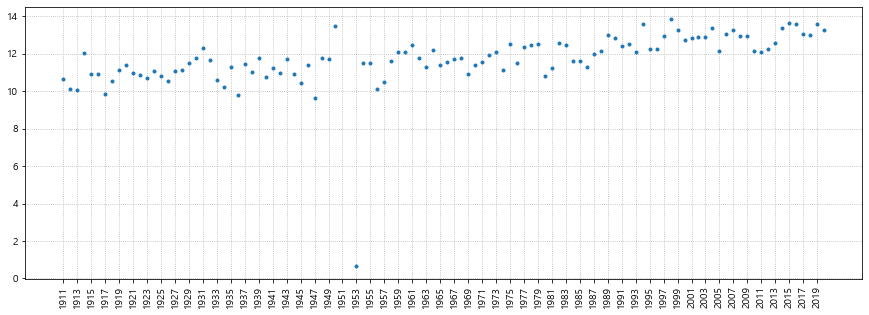

In [29]:
# 시각화하여 데이터 확인
plt.figure(figsize=(15,5))
plt.plot(df_seoul_mean, '.')
plt.xticks(range(1911,2021,2), rotation=90)
plt.grid(ls=':')
plt.show()

### 이상치 제거

In [30]:
df_seoul_mean.drop(index=[1950, 1953], inplace=True)

### 시각화

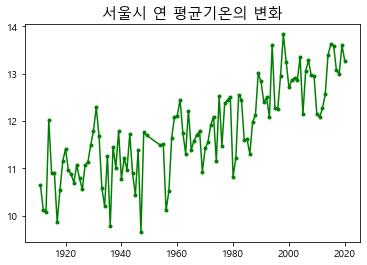

In [31]:
plt.plot(df_seoul_mean, 'g.-')
plt.title('서울시 연 평균기온의 변화', size=15)
plt.show()

## 서울시 연간 최저기온 변화

### 서울시 연간 최저기온 추출
* `연간 일 최저기온의 최저`<br>
연도로 그룹핑하여 최저기온의 최소값 추출

In [32]:
df_seoul_min = df_seoul.groupby(df_seoul['일시'].dt.year)['최저기온(°C)'].min()
df_seoul_min

일시
1911   -21.5
1912   -18.6
1913   -19.6
1914   -14.0
1915   -21.3
        ... 
2016   -18.0
2017   -12.6
2018   -17.8
2019   -10.9
2020   -12.9
Name: 최저기온(°C), Length: 108, dtype: float64

### 시각화

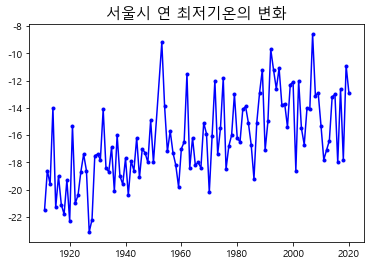

In [33]:
plt.plot(df_seoul_min, 'b.-')
plt.title('서울시 연 최저기온의 변화', size=15)
plt.show()

## 서울시 연간 최고기온 변화

### 서울시 연간 최고기온 추출
* `연간 최고기온의 최고`<br>
연도로 그룹핑하여 최고기온의 최대값 추출

In [34]:
df_seoul_max = df_seoul.groupby(df_seoul['일시'].dt.year)['최고기온(°C)'].max()
df_seoul_max

일시
1911    34.5
1912    34.0
1913    31.7
1914    35.6
1915    34.8
        ... 
2016    36.6
2017    35.4
2018    39.6
2019    36.8
2020    35.4
Name: 최고기온(°C), Length: 108, dtype: float64

### 1950, 1953년 데이터 제거

In [35]:
df_seoul_max.drop(index=[1950,1953], inplace=True)

### 시각화

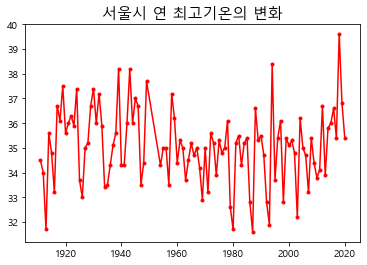

In [36]:
plt.plot(df_seoul_max, 'r.-')
plt.title('서울시 연 최고기온의 변화', size=15)
plt.show()

# 서울시 연간 평균기온, 최저기온, 최고기온 비교

## 서브플롯으로 각 그래프의 추세 비교

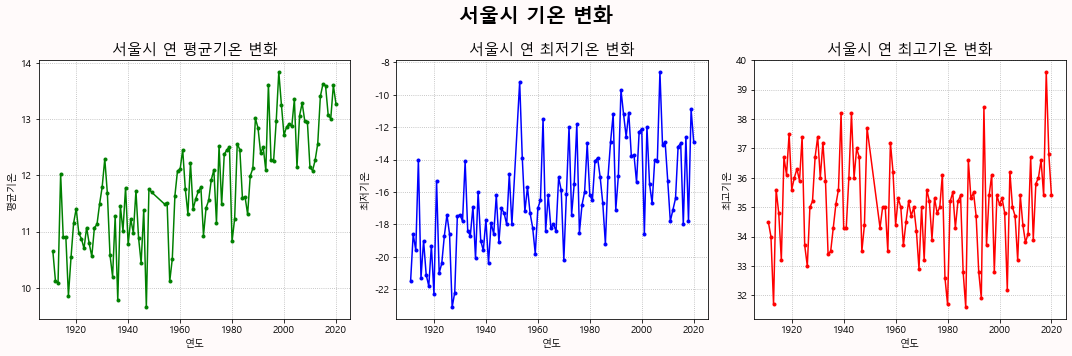

In [37]:
fig = plt.figure(figsize=(15,5), facecolor='snow')

plt.subplot(131)
plt.plot(df_seoul_mean, 'g.-')
plt.title('서울시 연 평균기온 변화', size=15)
plt.xlabel('연도')
plt.ylabel('평균기온')
plt.grid(ls=':')

plt.subplot(132)
plt.plot(df_seoul_min, 'b.-')
plt.title('서울시 연 최저기온 변화', size=15)
plt.xlabel('연도')
plt.ylabel('최저기온')
plt.grid(ls=':')

plt.subplot(133)
plt.plot(df_seoul_max, 'r.-')
plt.title('서울시 연 최고기온 변화', size=15)
plt.xlabel('연도')
plt.ylabel('최고기온')
plt.grid(ls=':')

fig.suptitle('서울시 기온 변화', size=20, fontweight='bold')
fig.tight_layout()
plt.show()

## 평균, 최저, 최고기온의 변동 폭 비교

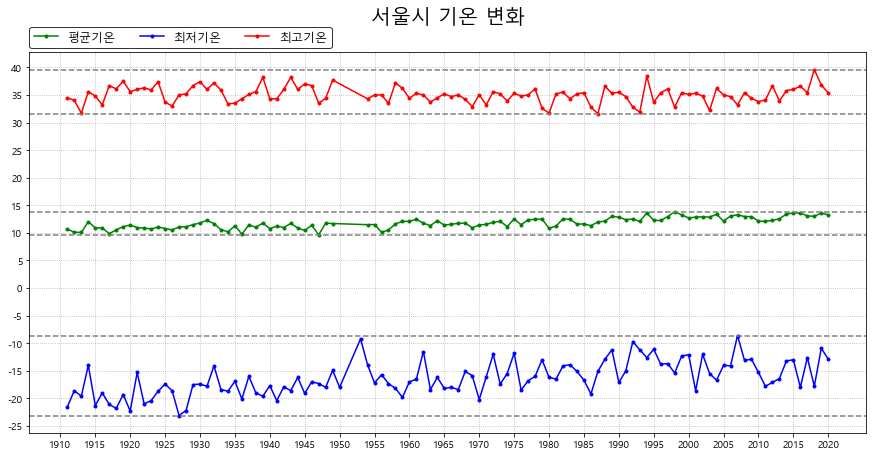

In [38]:
# 세 개의 플롯을 하나의 axes에 그리기
plt.figure(figsize=(15,7))

plt.plot(df_seoul_mean, 'g.-', label='평균기온')
plt.plot(df_seoul_min, 'b.-', label='최저기온')
plt.plot(df_seoul_max, 'r.-', label='최고기온')
plt.legend(loc=(0,1.01), ncol=3, fontsize=12, edgecolor='k')
plt.title('서울시 기온 변화', size=20, pad=30)

plt.xticks(range(1910,2021,5))
plt.yticks(range(-25,42,5))
plt.grid(ls=':')

# 수평선 ( 각 플롯의 최대, 최소값의 위치에 수평선 그리기 )
plt.axhline(df_seoul_mean.min(), color='gray', ls='--')
plt.axhline(df_seoul_mean.max(), color='gray', ls='--')

plt.axhline(df_seoul_min.min(), color='gray', ls='--')
plt.axhline(df_seoul_min.max(), color='gray', ls='--')

plt.axhline(df_seoul_max.min(), color='gray', ls='--')
plt.axhline(df_seoul_max.max(), color='gray', ls='--')

plt.show()